In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
benergy_c = np.arange(-7.5, -5.25, 0.25)
benergy_o = np.arange(-3.25, -5.5, -0.25)

In [3]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))

In [4]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            ch4_in = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[3.34472698e-01, 3.39231365e-01, 3.43974176e-01, 3.48933536e-01,
        3.53805203e-01, 3.58574746e-01, 3.61920090e-01, 3.56331117e-01,
        3.37657735e-01],
       [3.28533274e-01, 3.32081756e-01, 3.34938342e-01, 3.36558840e-01,
        3.36605648e-01, 3.34050483e-01, 3.20556064e-01, 2.65952315e-01,
        1.56534841e-01],
       [3.22721780e-01, 3.24506758e-01, 3.25480862e-01, 3.24254718e-01,
        3.19946104e-01, 3.06708548e-01, 2.35348075e-01, 1.28573864e-02,
        2.86525878e-03],
       [3.18202927e-01, 3.19391484e-01, 3.18920536e-01, 3.15556334e-01,
        3.05975938e-01, 2.59558307e-01, 4.26909989e-03, 5.45512489e-04,
        2.69875792e-04],
       [3.79479563e-12, 3.15230887e-01, 3.13982061e-01, 3.07922425e-01,
        2.84939349e-01, 6.28361144e-03, 1.61196623e-04, 4.37329717e-05,
        3.02454010e-05],
       [4.83219102e-12, 1.07766228e-02, 3.04515533e-01, 2.90737134e-01,
        1.56730046e-01, 9.85362171e-05, 8.53115052e-06, 4.16795456e-06,
        3.5

In [5]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,3.344727e-01,0.339231,0.343974,0.348934,3.538052e-01,3.585747e-01,3.619201e-01,3.563311e-01,3.376577e-01
-3.50,3.285333e-01,0.332082,0.334938,0.336559,3.366056e-01,3.340505e-01,3.205561e-01,2.659523e-01,1.565348e-01
-3.75,3.227218e-01,0.324507,0.325481,0.324255,3.199461e-01,3.067085e-01,2.353481e-01,1.285739e-02,2.865259e-03
-4.00,3.182029e-01,0.319391,0.318921,0.315556,3.059759e-01,2.595583e-01,4.269100e-03,5.455125e-04,2.698758e-04
-4.25,3.794796e-12,0.315231,0.313982,0.307922,2.849393e-01,6.283611e-03,1.611966e-04,4.373297e-05,3.024540e-05
-4.50,4.832191e-12,0.010777,0.304516,0.290737,1.567300e-01,9.853622e-05,8.531151e-06,4.167955e-06,3.522546e-06
-4.75,4.831040e-12,0.010759,0.270742,0.202066,2.165198e-04,2.533383e-06,6.041852e-07,4.370454e-07,4.096711e-07
-5.00,4.819203e-12,0.010758,0.100732,0.000547,1.574094e-06,1.145546e-07,5.553824e-08,4.792426e-08,4.664700e-08
-5.25,4.819203e-12,0.010750,0.004595,0.000002,2.778169e-08,6.962184e-09,4.951394e-09,4.636719e-09,4.577071e-09


In [6]:
# metals = {'Pt': {'C':-7.02516, 'O':-3.81153}, 'Pd':{'C':-7.16786, 'O':-4.13577}, 'Rh':{'C':-7.33484, 'O':-4.71419}, 
#           'Ru': {'C':-7.5979, 'O':-5.4492}, 'Ni': {'C':-6.79794, 'O':-4.98902}}
metals = {'Pt': {'C':-7.02516, 'O':-3.81153}, 'Pd':{'C':-7.16786, 'O':-4.13577}, 'Rh':{'C':(-6.65 - 7.11) / 2, 'O':(-4.31 - 4.88) / 2}, 'Ni': {'C':-6.79794, 'O':-4.98902}}
metal_x = []
metal_y = []
metal_names = []
for i, v in metals.items():
    metal_x.append(abs(v['C'] + 7.5) / 2.25 * 9)
    metal_y.append(abs(v['O'] + 3.125) / 2.25 * 9)
    metal_names.append(i)

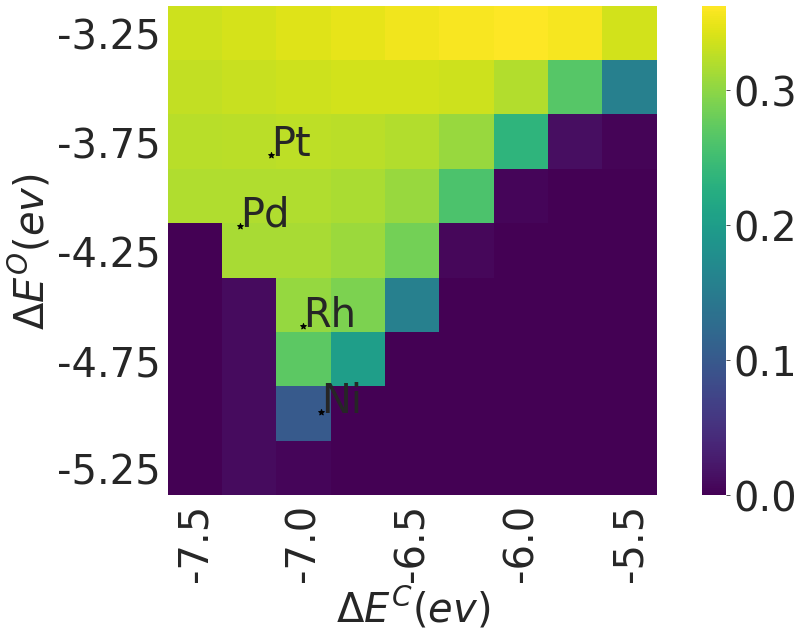

In [7]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/0.6_ch4_conv_bma.pdf', bbox_inches='tight')

# Heatmap For Syngas Conversion

In [8]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CO out'].to_list()[0]
            syngas_conv = co_out + h2_out
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(syngas_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[2.34022116e-02, 2.33786463e-02, 2.31386742e-02, 2.24737735e-02,
        2.13103742e-02, 1.94599026e-02, 1.65834163e-02, 1.26348414e-02,
        8.83036014e-03],
       [2.30984464e-02, 2.30914700e-02, 2.28788255e-02, 2.22324738e-02,
        2.10543798e-02, 1.91306638e-02, 1.57397060e-02, 9.69757341e-03,
        3.20004478e-03],
       [2.28154031e-02, 2.27770040e-02, 2.25684810e-02, 2.19092908e-02,
        2.06333943e-02, 1.81825152e-02, 1.09196147e-02, 5.39028599e-07,
        1.40960117e-07],
       [2.26525947e-02, 2.25710069e-02, 2.23311778e-02, 2.16186381e-02,
        2.00550056e-02, 1.49934705e-02, 2.77205183e-07, 6.03149397e-08,
        3.26163436e-08],
       [1.33328223e-11, 2.24808043e-02, 2.21904970e-02, 2.13094221e-02,
        1.86369291e-02, 2.31401648e-06, 7.95060318e-08, 1.78215794e-08,
        8.16696588e-09],
       [1.69712776e-11, 1.36227218e-03, 2.20508481e-02, 2.04815106e-02,
        8.37476926e-03, 2.54900347e-07, 2.00343782e-08, 4.48181464e-09,
        1.6

In [9]:
syngas_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
syngas_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,2.340221e-02,0.023379,0.023139,2.247377e-02,2.131037e-02,1.945990e-02,1.658342e-02,1.263484e-02,8.830360e-03
-3.50,2.309845e-02,0.023091,0.022879,2.223247e-02,2.105438e-02,1.913066e-02,1.573971e-02,9.697573e-03,3.200045e-03
-3.75,2.281540e-02,0.022777,0.022568,2.190929e-02,2.063339e-02,1.818252e-02,1.091961e-02,5.390286e-07,1.409601e-07
-4.00,2.265259e-02,0.022571,0.022331,2.161864e-02,2.005501e-02,1.499347e-02,2.772052e-07,6.031494e-08,3.261634e-08
-4.25,1.333282e-11,0.022481,0.022190,2.130942e-02,1.863693e-02,2.314016e-06,7.950603e-08,1.782158e-08,8.166966e-09
-4.50,1.697128e-11,0.001362,0.022051,2.048151e-02,8.374769e-03,2.549003e-07,2.003438e-08,4.481815e-09,1.601271e-09
-4.75,1.696695e-11,0.001362,0.021145,1.466670e-02,2.069600e-06,3.005675e-08,2.847162e-09,5.761208e-10,1.557835e-10
-5.00,1.693449e-11,0.001362,0.010278,3.179783e-05,4.942153e-08,1.534300e-09,1.868396e-10,3.782673e-11,1.116978e-11
-5.25,1.693358e-11,0.001361,0.000553,1.246408e-07,8.627081e-10,6.058109e-11,9.766818e-12,2.807891e-12,1.573542e-12


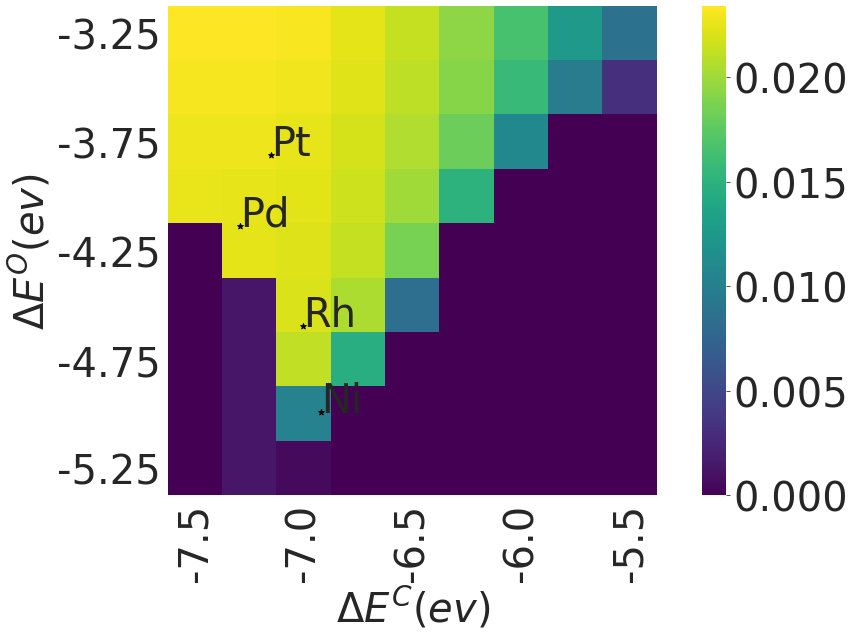

In [10]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/0.6_syngas_conv_bma.pdf', bbox_inches='tight')

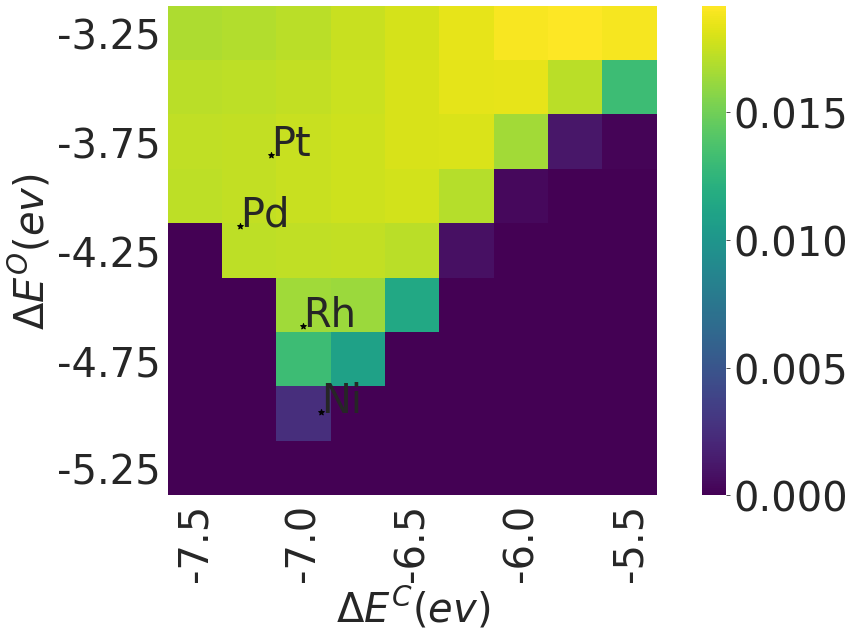

In [12]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'H2O out'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(h2o_out) + abs(co2_out)
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=0.6 with BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/0.6_full_conv_bma.pdf', bbox_inches='tight')

# Plots at C/O=1.0

In [13]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            syngas_conv = (co_out + h2_out) / ch4_in            
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
            data_syngas[j][i] = syngas_conv
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[6.27945642e-12, 3.95827872e-03, 1.47874696e-01, 2.42555208e-01,
        2.42169514e-01, 2.31722808e-01, 2.23137599e-01, 2.20196410e-01,
        2.16103217e-01],
       [6.28124649e-12, 4.88034396e-03, 1.85351627e-01, 2.61617475e-01,
        2.56120047e-01, 2.36673310e-01, 2.13960194e-01, 1.85698486e-01,
        1.50999544e-01],
       [6.27800198e-12, 5.62807740e-03, 2.50759610e-01, 2.84680003e-01,
        2.66880103e-01, 2.39709245e-01, 1.95685631e-01, 9.02084653e-02,
        7.70270474e-03],
       [6.27363869e-12, 5.92505424e-03, 2.81579645e-01, 2.97476539e-01,
        2.73564520e-01, 2.35170520e-01, 5.61314991e-02, 1.10977687e-03,
        4.86399606e-04],
       [4.94663684e-12, 5.99210402e-03, 9.11742495e-02, 3.03042883e-01,
        2.74020567e-01, 1.50421078e-01, 3.54051371e-04, 7.96774686e-05,
        5.18765718e-05],
       [6.27923266e-12, 6.00276376e-03, 4.24113063e-02, 3.01148269e-01,
        2.41373188e-01, 3.10443747e-04, 1.65550123e-05, 7.18941127e-06,
        5.9

In [14]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,6.279456e-12,0.003958,0.147875,0.242555,2.421695e-01,2.317228e-01,2.231376e-01,2.201964e-01,2.161032e-01
-3.50,6.281246e-12,0.004880,0.185352,0.261617,2.561200e-01,2.366733e-01,2.139602e-01,1.856985e-01,1.509995e-01
-3.75,6.278002e-12,0.005628,0.250760,0.284680,2.668801e-01,2.397092e-01,1.956856e-01,9.020847e-02,7.702705e-03
-4.00,6.273639e-12,0.005925,0.281580,0.297477,2.735645e-01,2.351705e-01,5.613150e-02,1.109777e-03,4.863996e-04
-4.25,4.946637e-12,0.005992,0.091174,0.303043,2.740206e-01,1.504211e-01,3.540514e-04,7.967747e-05,5.187657e-05
-4.50,6.279233e-12,0.006003,0.042411,0.301148,2.413732e-01,3.104437e-04,1.655501e-05,7.189411e-06,5.909072e-06
-4.75,6.278450e-12,0.006005,0.033461,0.269158,1.162055e-03,5.967960e-06,1.069051e-06,7.326810e-07,6.792919e-07
-5.00,6.525591e-12,0.006005,0.030348,0.004969,4.934004e-06,2.170121e-07,9.354304e-08,7.885468e-08,7.640328e-08
-5.25,6.290756e-12,0.006004,0.027286,0.000007,5.090419e-08,1.024347e-08,7.125974e-09,6.639579e-09,6.538753e-09


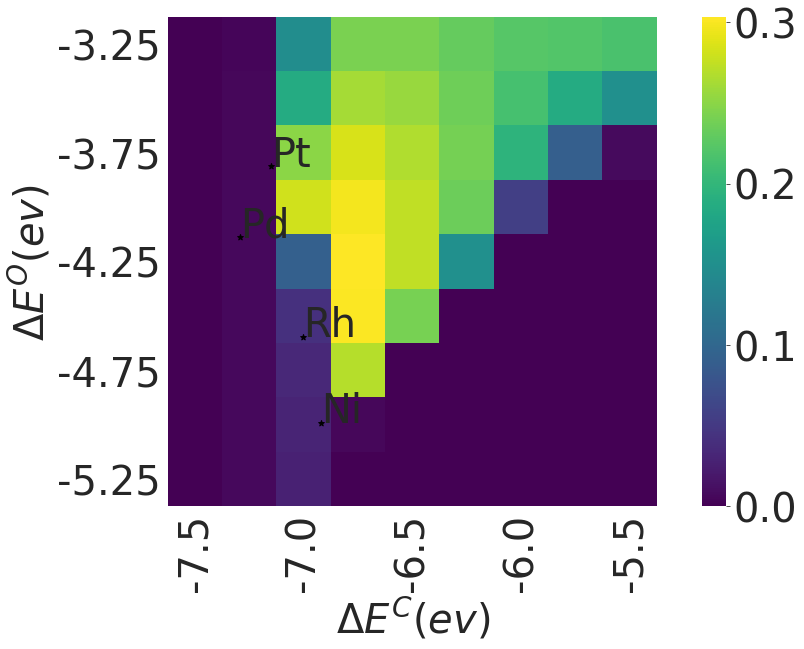

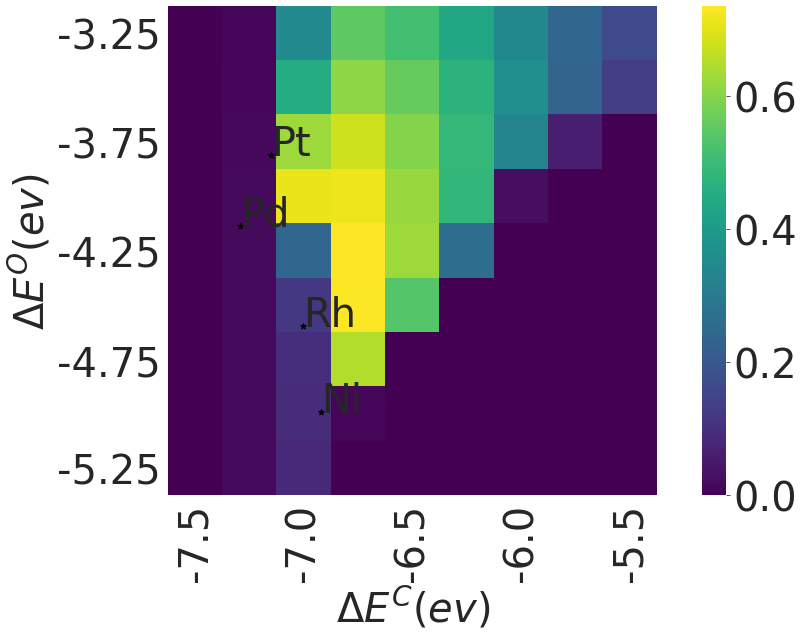

In [15]:
# plot CH4 conversion
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
# cmap = sns.color_palette("Blues", as_cmap=True)
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, vmin=0, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=1 with BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/1_ch4_conv_bma.pdf', bbox_inches='tight')




syngas_conv_df = pd.DataFrame(data_syngas, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
# cmap = sns.color_palette("Blues", as_cmap=True)
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, vmin=0, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion at C/O=1 with BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/1_syngas_conv_bma.pdf', bbox_inches='tight')

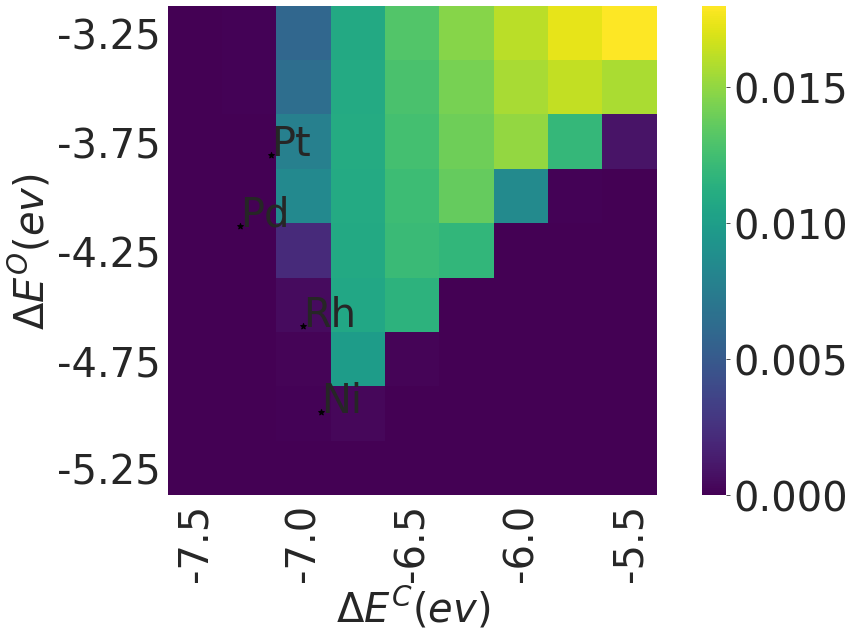

In [17]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'H2O out'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(h2o_out) + abs(co2_out)
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=1.0 with BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/1_full_conv_bma.pdf', bbox_inches='tight')

# Plots at C/O=2.6

In [16]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
#             ch4_conv = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'Max CH4 Conv'].to_list()[0]
            h2_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 in'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            syngas_conv = (co_out + h2_out/2) / ch4_in    
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
            data_syngas[j][i] = syngas_conv
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[2.66216754e-11, 2.02187244e-11, 1.25446355e-02, 7.13776542e-02,
        8.25430848e-02, 8.04320024e-02, 7.50867004e-02, 7.11677491e-02,
        7.08777932e-02],
       [9.30374742e-12, 7.13505379e-11, 1.40315794e-02, 7.63880970e-02,
        9.01140121e-02, 8.64126919e-02, 7.71896686e-02, 6.75062703e-02,
        6.01168730e-02],
       [9.32378002e-12, 2.01942542e-11, 1.55870214e-02, 9.12659470e-02,
        1.00592896e-01, 9.20317386e-02, 7.87417776e-02, 5.96140424e-02,
        4.18800171e-02],
       [9.32479433e-12, 2.01818289e-11, 1.47133211e-02, 1.06306745e-01,
        1.10509894e-01, 9.71485333e-02, 7.31566762e-02, 1.05535267e-02,
        1.80947222e-03],
       [7.35411913e-12, 2.01800538e-11, 1.32433731e-02, 1.15898713e-01,
        1.20307755e-01, 9.92964546e-02, 3.57380201e-03, 2.87164517e-04,
        1.50949736e-04],
       [9.26875377e-12, 2.01780252e-11, 1.26730345e-02, 1.13045240e-01,
        1.29035249e-01, 3.75081648e-02, 7.89622607e-05, 2.15760755e-05,
        1.5

[Text(0.5, 1.0, 'Syngas Conversion at C/O=2.6 with BMA'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

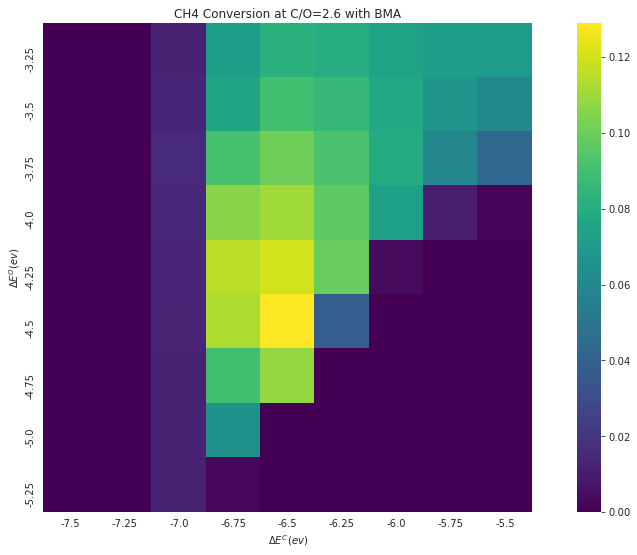

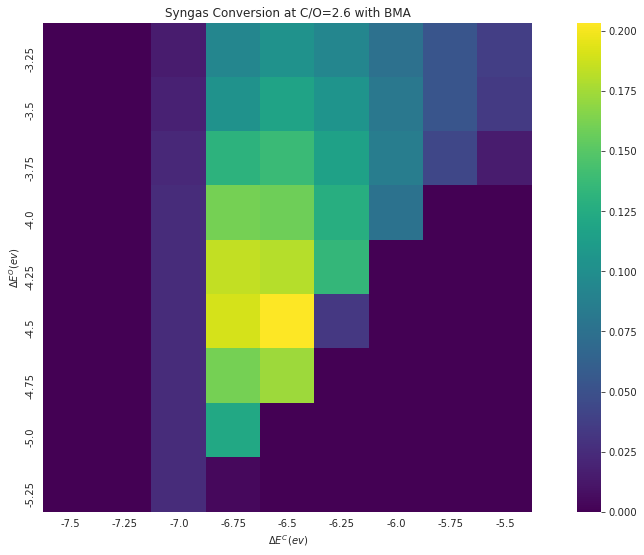

In [15]:
# plot CH4 conversion
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
# cmap = sns.color_palette("Blues", as_cmap=True)
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, vmin=0, cmap=cmap)
ax.set(title="CH4 Conversion at C/O=2.6 with BMA",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))





syngas_conv_df = pd.DataFrame(data_syngas, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, vmin=0, cmap=cmap)
ax.set(title="Syngas Conversion at C/O=2.6 with BMA",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

## Plot the volcano plots for half change distance

In [19]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            half_conc_dist = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'Dist to 50 CH4 Conv'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            if half_conc_dist == 510:
                data[j][i] = 0
            else:
                data[j][i] = abs(half_conc_dist)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '23.0_c-6.00o-4.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 23.0
[Errno 2] No such file or directory: '10.0_c-5.75o-3.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 10.0
[Errno 2] No such file or directory: '14.0_c-5.75o-4.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 14.0
[Errno 2] No such file or directory: '15.0_c-5.75o-4.50/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 15.0
[Errno 2] No such file or directory: '4.0_c-5.50o-4.00/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 4.0
[Errno 2] No such file or directory: '5.0_c-5.50o-4.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 5.0


array([[ 0.  , 12.83, 10.12, 10.08, 10.08, 10.11, 10.13,  0.  ,  0.  ],
       [ 0.  , 12.4 , 10.09, 10.07, 10.08, 10.08, 10.11,  0.  ,  0.  ],
       [ 0.  , 13.13, 10.06, 10.06, 10.06, 10.09, 10.1 ,  0.  ,  0.  ],
       [ 0.  , 17.83, 10.06, 10.05, 10.06, 10.07,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 10.05, 10.05, 10.05, 10.08,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 10.21, 10.05, 10.05,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 10.77, 10.06, 10.11, 16.22,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 11.7 , 10.07, 15.9 ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 11.89, 16.6 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

[Text(0.5, 1.0, 'half concentration disctantces'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

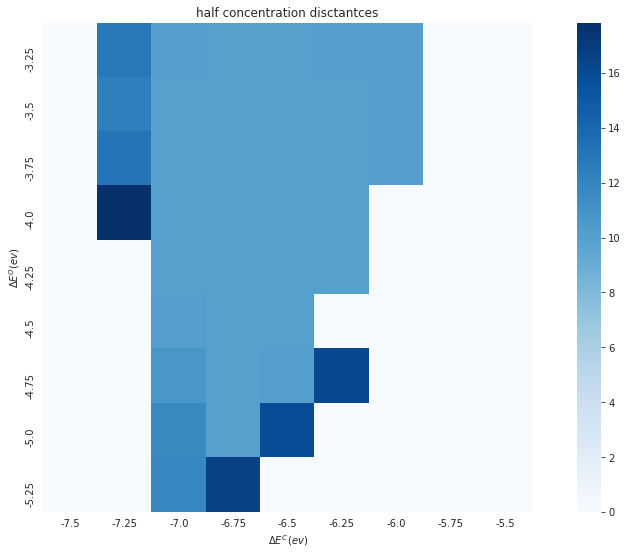

In [20]:
half_conc_dist_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(half_conc_dist_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
ax.set(title="half concentration disctantces",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

## Distances to max temperature

In [21]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            max_temp_dist = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'Dist to max temp'].to_list()[0]
            data[j][i] = abs(max_temp_dist)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '23.0_c-6.00o-4.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 23.0
[Errno 2] No such file or directory: '10.0_c-5.75o-3.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 10.0
[Errno 2] No such file or directory: '14.0_c-5.75o-4.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 14.0
[Errno 2] No such file or directory: '15.0_c-5.75o-4.50/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 15.0
[Errno 2] No such file or directory: '4.0_c-5.50o-4.00/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 4.0
[Errno 2] No such file or directory: '5.0_c-5.50o-4.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 5.0


array([[10.  , 13.49, 10.31, 10.24, 10.22, 10.25, 10.25,  0.  , 10.03],
       [10.01, 12.95, 10.25, 10.18, 10.19, 10.2 , 10.24, 10.03, 10.01],
       [10.  , 13.67, 10.15, 10.13, 10.15, 10.21, 10.24, 10.01, 10.03],
       [10.01, 18.79, 10.1 , 10.11, 10.14, 10.18, 10.02, 10.09,  0.  ],
       [10.  , 70.  , 10.08, 10.09, 10.13, 10.19,  0.  ,  0.  ,  0.  ],
       [10.  , 70.  , 10.26, 10.07, 10.1 , 10.04, 12.96,  0.  , 70.  ],
       [10.01, 70.  , 10.97, 10.06, 10.13, 16.25, 70.  , 70.  , 70.  ],
       [10.  , 70.  , 19.99, 10.08, 15.91, 70.  , 70.  , 70.  , 70.  ],
       [10.01, 70.  , 19.99, 16.64, 70.  , 70.  , 70.  , 70.  , 70.  ]])

[Text(0.5, 1.0, 'half concentration disctantces'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

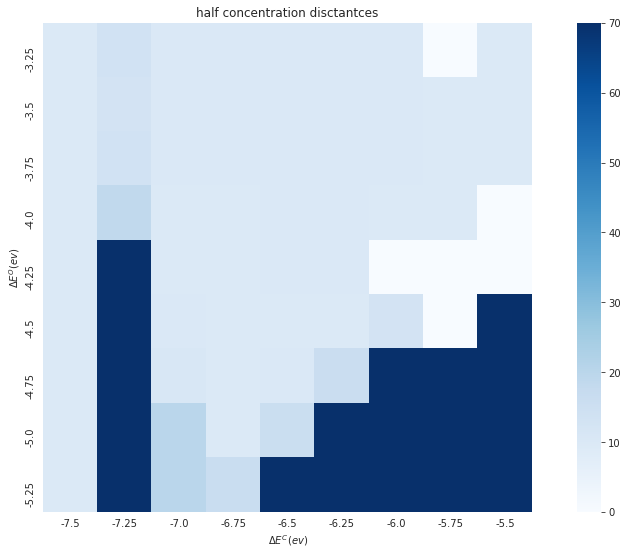

In [22]:
max_temp_dist_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(max_temp_dist_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
ax.set(title="half concentration disctantces",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

In [18]:
import shutil
rtols = [1.0e-10, 1.0e-09, 1.0e-08, 1.0e-07, 1.0e-06]
atols = [1.0e-20, 1.0e-18, 1.0e-16, 1.0e-14, 1.0e-12]
tol_combs = []
for index in range(len(rtols)):
    tol_combs.append([rtols[index], atols[index]])
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1
        for tol_comb in tol_combs:
            f_path = '{}_c{:.2f}o{:.2f}/rtol_{}_atol_{}'.format(index, c_binding_energy, o_binding_energy, tol_comb[0], tol_comb[1])
            print(f_path)
            shutil.rmtree(f_path)

73.0_c-7.50o-3.25/rtol_1e-10_atol_1e-20
73.0_c-7.50o-3.25/rtol_1e-09_atol_1e-18
73.0_c-7.50o-3.25/rtol_1e-08_atol_1e-16
73.0_c-7.50o-3.25/rtol_1e-07_atol_1e-14
73.0_c-7.50o-3.25/rtol_1e-06_atol_1e-12
74.0_c-7.50o-3.50/rtol_1e-10_atol_1e-20
74.0_c-7.50o-3.50/rtol_1e-09_atol_1e-18
74.0_c-7.50o-3.50/rtol_1e-08_atol_1e-16
74.0_c-7.50o-3.50/rtol_1e-07_atol_1e-14
74.0_c-7.50o-3.50/rtol_1e-06_atol_1e-12
75.0_c-7.50o-3.75/rtol_1e-10_atol_1e-20
75.0_c-7.50o-3.75/rtol_1e-09_atol_1e-18
75.0_c-7.50o-3.75/rtol_1e-08_atol_1e-16
75.0_c-7.50o-3.75/rtol_1e-07_atol_1e-14
75.0_c-7.50o-3.75/rtol_1e-06_atol_1e-12
76.0_c-7.50o-4.00/rtol_1e-10_atol_1e-20
76.0_c-7.50o-4.00/rtol_1e-09_atol_1e-18
76.0_c-7.50o-4.00/rtol_1e-08_atol_1e-16
76.0_c-7.50o-4.00/rtol_1e-07_atol_1e-14
76.0_c-7.50o-4.00/rtol_1e-06_atol_1e-12
77.0_c-7.50o-4.25/rtol_1e-10_atol_1e-20
77.0_c-7.50o-4.25/rtol_1e-09_atol_1e-18
77.0_c-7.50o-4.25/rtol_1e-08_atol_1e-16
77.0_c-7.50o-4.25/rtol_1e-07_atol_1e-14
77.0_c-7.50o-4.25/rtol_1e-06_atol_1e-12
